In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to (28, 28, 1) as Fashion-MNIST consists of grayscale images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4966 - accuracy: 0.8183 - val_loss: 0.3727 - val_accuracy: 0.8630
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3199 - accuracy: 0.8834 - val_loss: 0.3194 - val_accuracy: 0.8835
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2740 - accuracy: 0.9002 - val_loss: 0.3068 - val_accuracy: 0.8871
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2465 - accuracy: 0.9085 - val_loss: 0.2773 - val_accuracy: 0.8977
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2215 - accuracy: 0.9185 - val_loss: 0.2705 - val_accuracy: 0.9022
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2029 - accuracy: 0.9239 - val_loss: 0.2760 - val_accuracy: 0.9002
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1843 - accuracy: 0.9318 - val_loss: 0.2768 -

313/313 [==============================] - 2s 5ms/step


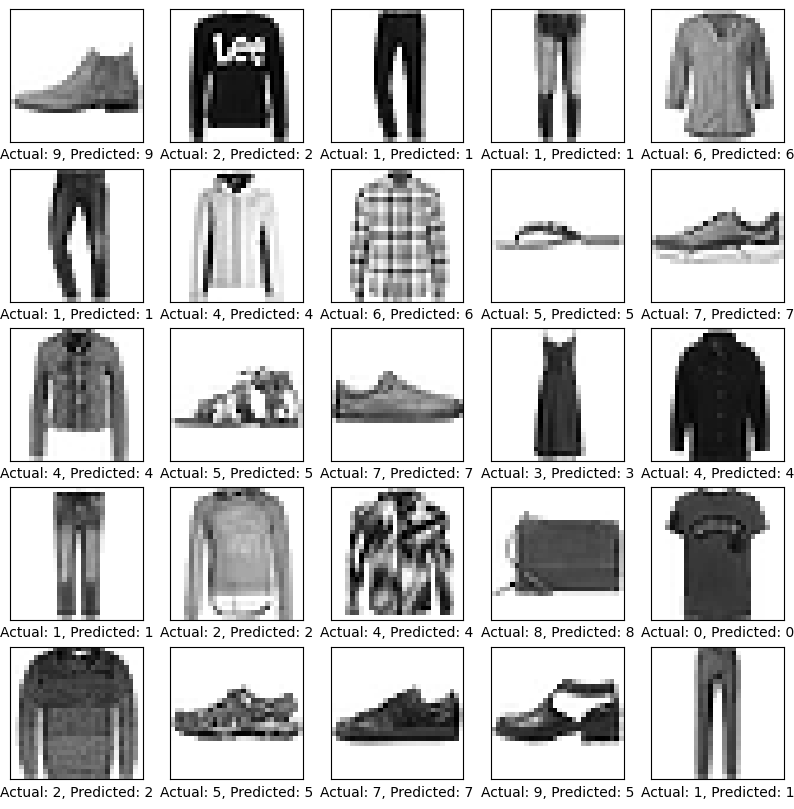

In [2]:
# print some samples
import matplotlib.pyplot as plt
import numpy as np

# get the predictions
predictions = model.predict(x_test)

# get the index of the largest probability
predictions = np.argmax(predictions, axis=1)

# get the first 25 samples
x_test = x_test[:25]
y_test = y_test[:25]
predictions = predictions[:25]

# plot the samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {y_test[i]}, Predicted: {predictions[i]}')
plt.show()


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)